In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from functools import reduce
from math import gamma
from operator import mul
import math

In [2]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

In [3]:
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

In [4]:
class GumbelSoftmax:
    def __init__(self, p=[10,10,10], tau = 2):
        self.p = np.array(p)
        self.tau = tau
        self.k = len(self.p) 
        self.coef = gamma(self.k)*np.power(self.tau,(self.k-1))
        
    def pdf(self, x):
        x = np.array(x)
        a = np.power(self.p.dot(np.power(x, -self.tau)), -self.k)
        b = np.prod(np.power(x, -(self.tau + 1)))
        return self.coef * a * b

In [5]:
def draw_pdf_contours(dist, subdiv=8, **kwargs):
    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]
    plt.tricontourf(trimesh, pvals, 200, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    plt.show()

probs = [9 1 9] , tau =  2


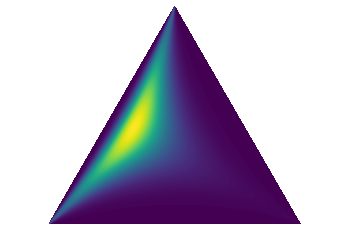

probs = [4 4 1] , tau =  2


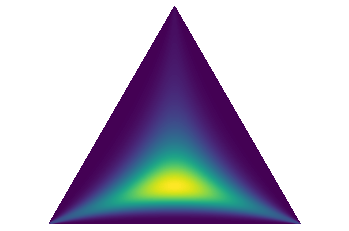

probs = [5 1 4] , tau =  2


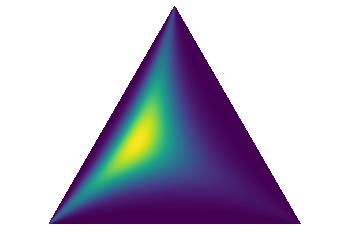

probs = [6 2 2] , tau =  2


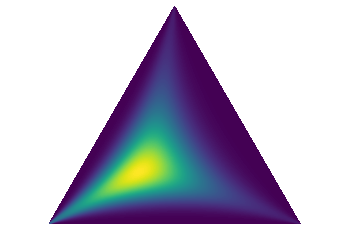

probs = [9 2 6] , tau =  2


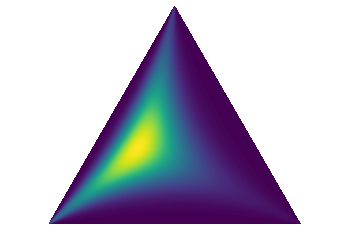

In [6]:
for i in range(5):
    probs = np.random.randint(1, 10, size=3)
    tau = 2
    print('probs =', probs, ', tau = ', tau)
    draw_pdf_contours(GumbelSoftmax(probs, tau))

probs = [1 6 1] , tau =  1.1


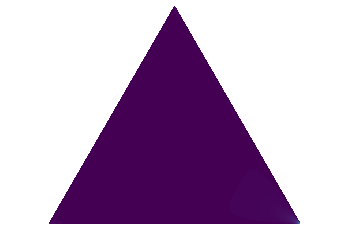

probs = [1 9 8] , tau =  1.5


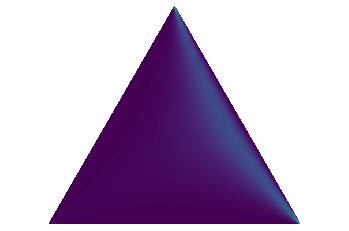

probs = [2 1 1] , tau =  2


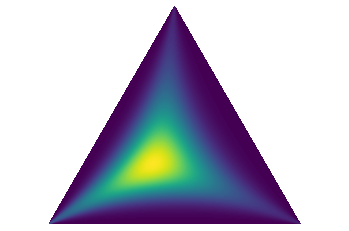

probs = [7 2 9] , tau =  4


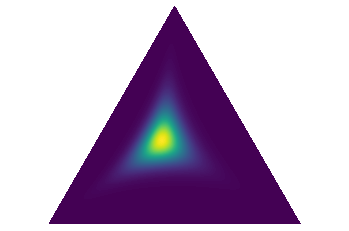

probs = [3 1 5] , tau =  6


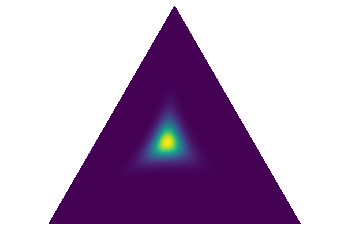

In [7]:
for tau in [1.1, 1.5, 2, 4, 6]:
    probs = np.random.randint(1, 10, size=3)
    print('probs =', probs, ', tau = ', tau)
    draw_pdf_contours(GumbelSoftmax(probs, tau))